In [109]:
import scanpy as sc
import os
import pandas as pd
import numpy as np

In [3]:
adata_Mye = sc.read_h5ad("adata-Fmye.h5ad")
bdata_Mye = sc.read_h5ad("BCM-Mye.h5ad")

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
bdata_Mye.var_names_make_unique()

We first concat BCY and BCM Myeloid cells, then use harmony and leiden to recluster.

In [4]:
common_vars = pd.unique(adata_Mye.var_names.intersection(bdata_Mye.var_names))
adata_Mye = adata_Mye[:, common_vars]
bdata_Mye = bdata_Mye[:, common_vars]
bdata_Mye.obs['sample']=bdata_Mye.obs['batch']
data_Mye = adata_Mye.concatenate(bdata_Mye, batch_categories=['Young', 'Middle'])
data_Mye

/tmp/ipykernel_922195/2662043940.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata_Mye.obs['sample']=bdata_Mye.obs['batch']
/tmp/ipykernel_922195/2662043940.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  data_Mye = adata_Mye.concatenate(bdata_Mye, batch_categories=['Young', 'Middle'])


AnnData object with n_obs × n_vars = 55060 × 19885
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'leiden-B', 'leiden-Mye', 'Mye-type', 'sample', 'leiden-major', 'major-type'
    var: 'n_cells_by_counts-Middle', 'mean_counts-Middle', 'log1p_mean_counts-Middle', 'pct_dropout_by_counts-Middle', 'total_counts-Middle', 'log1p_total_counts-Middle', 'n_cells-Middle', 'highly_variable-Middle', 'means-Middle', 'dispersions-Middle', 'dispersions_norm-Middle', 'ID-Middle', 'name-Middle', 'type-Middle', 'n_cells_by_counts-Young', 'mean_counts-Young', 'log1p_mean_counts-Young', 'pct_dropout_by_counts-Young', 'total_counts-Young', 'log1p_total_counts-Young', 'n_cells-Young', 'hi

In [220]:
data_Mye

NameError: name 'data_Mye' is not defined

In [ ]:
# write and read
sc.write("data-Mye.h5ad", data_Mye)
data_Mye = sc.read_h5ad("data-Mye.h5ad")

Ignoring processing doublet cells...


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-02-22 21:28:31,714 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-02-22 21:30:24,133 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-02-22 21:30:24,630 - harmonypy - INFO - Iteration 1 of 20
2024-02-22 21:31:00,875 - harmonypy - INFO - Iteration 2 of 20
2024-02-22 21:31:37,190 - harmonypy - INFO - Converged after 2 iterations
/home/rzh/BCY/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


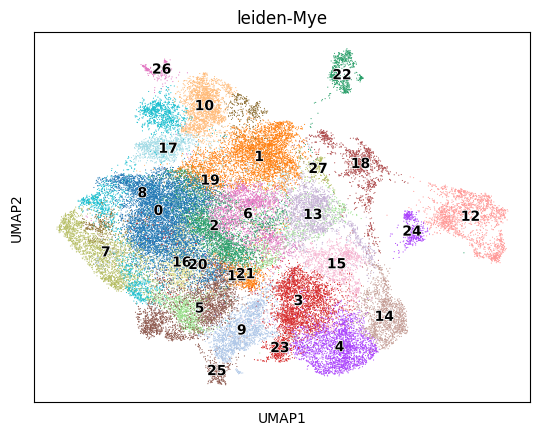

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

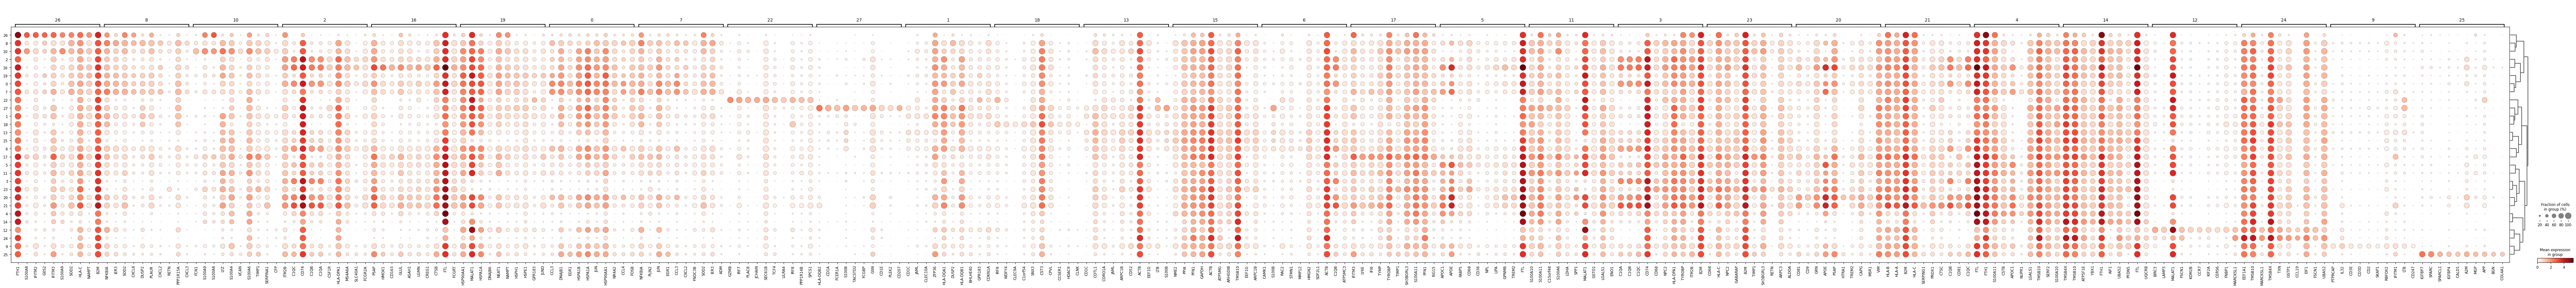

In [9]:
# for about 15min
data_Mye = clu(data_Mye, do_har=True, do_scrublet=False, key_added='leiden-Mye', rep='X_pca_harmony', resolution=1)

In [5]:
# filter the TYROBP- cells and do recluster
data_Mye = data_Mye[~data_Mye.obs['leiden-Mye'].isin(['4', '12', '13'])]
# recluster
data_Mye = clu(data_Mye, do_har=True, do_scrublet=False, key_added='leiden-Mye', rep='X_pca_harmony', resolution=1)
data_Mye = marker(data_Mye, groupby='leiden-Mye', prefix='allMye')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


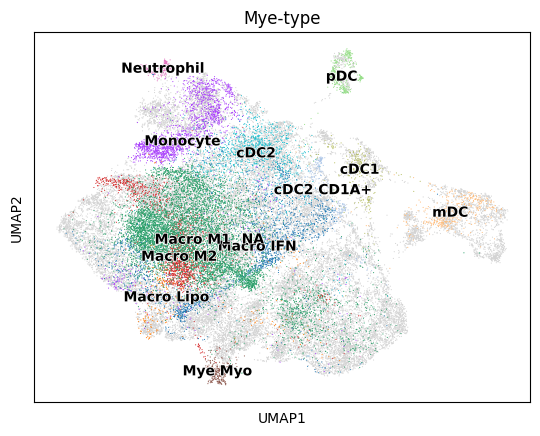

In [17]:
# the annotation from BCY
sc.pl.umap(data_Mye, color='Mye-type', legend_loc='on data', legend_fontoutline=1)

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


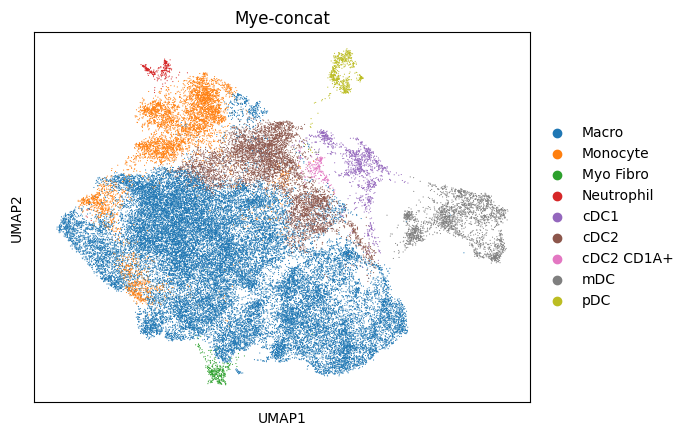

In [24]:
data_Mye.obs['Mye-concat'] = 'Macro'
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['26']), "Mye-concat"
] = "Neutrophil"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['10', '17', '8']), "Mye-concat"
] = "Monocyte"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['18']), "Mye-concat"
] = "cDC1"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['1', '13']), "Mye-concat"
] = "cDC2"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['27']), "Mye-concat"
] = "cDC2 CD1A+"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['12', '24']), "Mye-concat"
] = "mDC"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['22']), "Mye-concat"
] = "pDC"
data_Mye.obs.loc[  
    data_Mye.obs["leiden-Mye"].isin(['25']), "Mye-concat"
] = "Myo Fibro"
sc.pl.umap(data_Mye, color='Mye-concat')
sc.write("data-Mye-fix.h5ad", data_Mye)

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


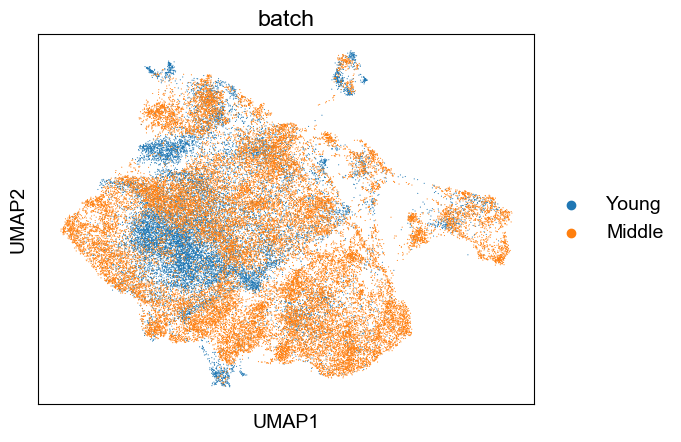

In [86]:
sc.pl.umap(data_Mye, color='batch')

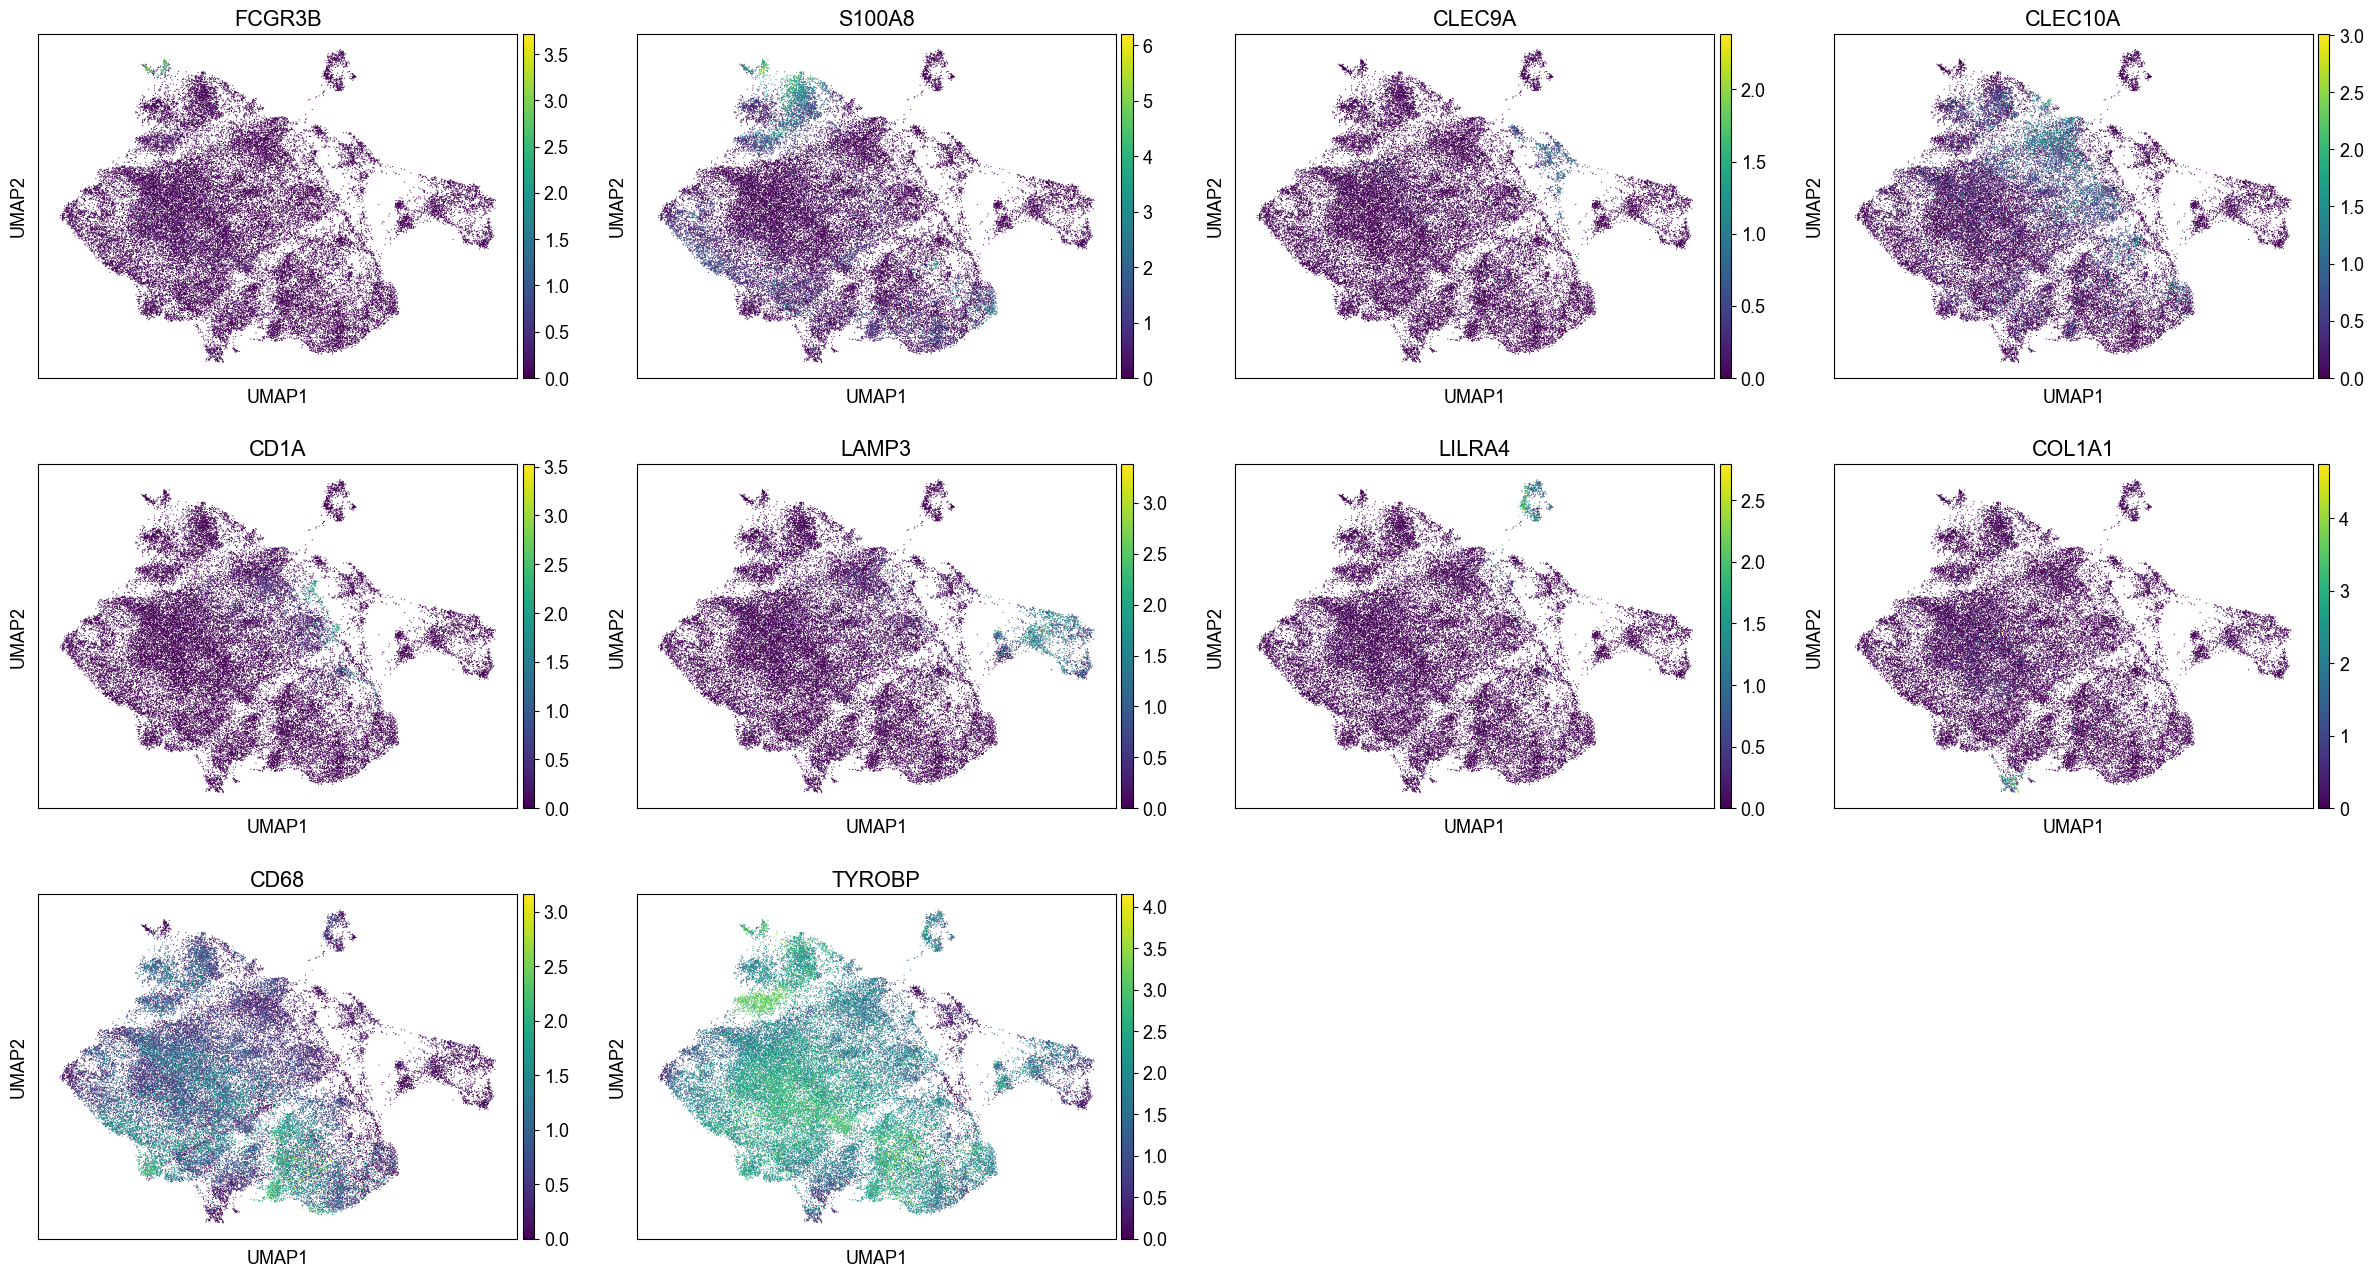

In [110]:
sc.pl.umap(data_Mye, color=['FCGR3B',  # Neutrophil
                            'S100A8',  # Monocyte
                            'CLEC9A',  # cDC1
                            'CLEC10A',    # cDC2
                            'CD1A',    # cDC2-CD1A+
                            'LAMP3',   # mDC
                            'LILRA4',  # pDC
                            'COL1A1',  # Macro-Fibro
                            'CD68',    # Macro
                            'TYROBP',  # Myeloid
                           ])

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])


In [78]:
from collections import Counter
def propByCell(adata, group, key, batch):
    groups = adata.obs[batch][adata.obs[group]==key]
    props = Counter(groups)
    all = sum(props.values())
    for item in props.keys():
        props[item] = (props[item] / all)
    return props

def propByBatch(adata, group, key, batch):
    groups = adata.obs[batch][adata.obs[group]==key]
    props = Counter(groups)
    for item in props.keys():
        props[item] = (props[item] / sum(adata.obs[batch]==item))
    return props
propByBatch(data_Mye, 'Mye-concat', 'mDC', 'batch')

Counter({'Middle': 0.06156920290986294, 'Young': 0.02351776209926971})

In [34]:
list(prop(data_Mye, 'Mye-concat', 'mDC', 'batch').keys())

['Young', 'Middle']

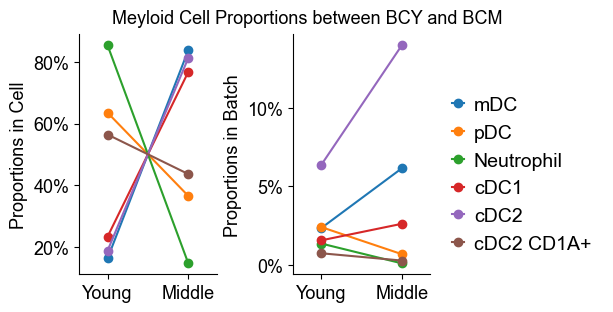

In [108]:
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 13

def propPlot(adata, ax, group, keys, diff, mode='Cell', showLegend=True):
    if mode=='Cell':
        fn=propByCell
    else:
        fn=propByBatch
    for key in keys:
        props = fn(adata, group, key, diff)
        y=list(props.values())
        x=list(props.keys())
        ax.plot(x, y, marker='o', label=key)
        bar=list(props.keys())
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    ax.set_ylabel('Proportions in {}'.format(mode))
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_xlim(-0.35,1.35)
    if showLegend:
        ax.legend( bbox_to_anchor=(1, 0), 
              handletextpad=0.5, frameon=False,
                          borderpad=0.6,
                          columnspacing=1.3,
                          handlelength=0.65,
              loc='lower left', fontsize=14)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6, 3),constrained_layout=True)
propPlot(data_Mye, ax[0], 'Mye-concat', 
         ['mDC', 'pDC', 'Neutrophil', 'cDC1', 'cDC2', 'cDC2 CD1A+'], 'batch', showLegend=False)
propPlot(data_Mye, ax[1], 'Mye-concat', ['mDC', 'pDC', 'Neutrophil', 'cDC1', 'cDC2', 'cDC2 CD1A+'], 'batch', mode="Batch")
fig.suptitle("Meyloid Cell Proportions between BCY and BCM", fontsize=13)
fig.show()
fig.savefig("Myeloid-Cell-prop-plot.svg", bbox_inches='tight')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


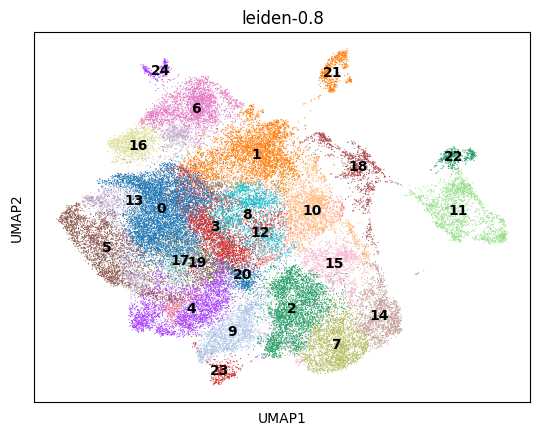

In [15]:
sc.tl.leiden(data_Mye, resolution=0.8, key_added='leiden-0.8')
sc.pl.umap(data_Mye, color='leiden-0.8', palette=sc.pl.palettes.default_20, legend_loc="on data")

In [8]:
def clu(adata, key_added, n_neighbors=50, n_pcs=30, rep='X_pca_harmony', do_har=False, max_iter=20, resolution=1, do_scrublet=True, har_key='batch'):
    # Computing the neighborhood graph
    if do_scrublet:
        n0 = adata.shape[0]
        print("{0} Cell number: {1}".format(key_added, n0))
        sc.external.pp.scrublet(adata, random_state=112)
        adata = adata[adata.obs['predicted_doublet']==False,:].copy()
        print("{0} Cells retained after scrublet, {1} cells reomved.".format(adata.shape[0], n0-adata.shape[0]))
    else:
        print("Ignoring processing doublet cells...")
    sc.tl.pca(adata, svd_solver='arpack')
    if do_har:
        sc.external.pp.harmony_integrate(adata, key='batch',max_iter_harmony=max_iter)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    # Run UMAP
    sc.tl.umap(adata)
    sc.tl.leiden(adata, key_added=key_added, resolution=resolution)
    sc.pl.umap(adata, color=key_added, legend_fontoutline=True, palette=sc.pl.palettes.default_20, legend_loc="on data")
    return adata

def marker(adata, groupby, method='wilcoxon', prefix=''):
    sc.tl.rank_genes_groups(adata, groupby = groupby, method = method)
    sc.tl.dendrogram(adata, groupby=groupby, use_rep='X_pca_harmony')
    sc.pl.rank_genes_groups_dotplot(adata, groupby = groupby, save=prefix+groupby+'.svg')
    return adata

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


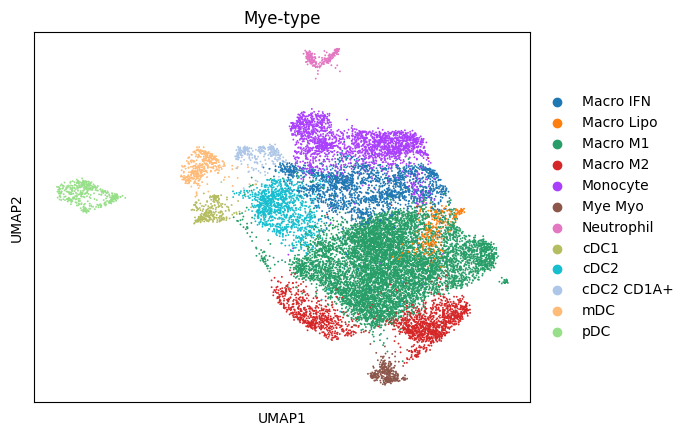